In [1]:
import os, shutil, pathlib
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import glob
import re #Use to split with several delimiters

In [2]:
#Create the train, validation and test datasets

original_dir = pathlib.Path("Single_mask_subdivised_HS_vineyard")
new_base_dir = pathlib.Path("organized_HS_Vineyard")

def make_subset(subset_name, start_index, end_index):
  for category in ("_classification", ""):
    dir = new_base_dir / subset_name / "chunk".__add__(category)
    os.makedirs(dir)
    fnames = [f"chunk_{i}{category}.npy" for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src= "drive/MyDrive/Hiper & Vine Data" / original_dir / fname,dst=dir / fname)

make_subset("train", start_index=0, end_index=50)
make_subset("validation", start_index=50, end_index=60)
make_subset("test", start_index=60, end_index=75)

In [3]:
data_directory = "organized_HS_Vineyard"
hypercube_max_value = 0

for phase in os.listdir(data_directory):
    for data_type in os.listdir(f"{data_directory}/{phase}"):
        for chunk in os.listdir(f"{data_directory}/{phase}/{data_type}"):
                    current_chunk = np.load(f"{data_directory}/{phase}/{data_type}/{chunk}", allow_pickle = True)
                    if np.amax(current_chunk) > hypercube_max_value:
                        hypercube_max_value = np.amax(current_chunk)

print(hypercube_max_value)

2119.0


In [4]:
def find_number(chunk_path): #Le but c'est d'isoler le nombre pour pouvoir trier par ca 
  for s in re.split(r"_|.npy", chunk_path[0]): #_ for the mask files and .net for the data files
    if s.isdigit():
      return s
  

In [5]:
train_chunks_unloaded = []
validation_chunks_unloaded = []
test_chunks_unloaded = []

train_mask_unloaded = []
validation_mask_unloaded = []
test_mask_unloaded = []

for phase in os.listdir(data_directory):
    if phase == "train":
        for data_type in os.listdir(f"{data_directory}/{phase}"):
            if data_type == "chunk":
                for chunk in os.listdir(f"{data_directory}/{phase}/{data_type}"):
                    current_chunk = glob.glob(f"{data_directory}/{phase}/{data_type}/{chunk}")
                    train_chunks_unloaded.append(current_chunk)
            if data_type == "chunk_classification":
                for chunk in os.listdir(f"{data_directory}/{phase}/{data_type}"):
                    current_chunk = glob.glob(f"{data_directory}/{phase}/{data_type}/{chunk}")
                    train_mask_unloaded.append(current_chunk)

    if phase == "validation":
        for data_type in os.listdir(f"{data_directory}/{phase}"):
            if data_type == "chunk":
                for chunk in os.listdir(f"{data_directory}/{phase}/{data_type}"):
                    current_chunk = glob.glob(f"{data_directory}/{phase}/{data_type}/{chunk}")
                    validation_chunks_unloaded.append(current_chunk)
            if data_type == "chunk_classification":
                for chunk in os.listdir(f"{data_directory}/{phase}/{data_type}"):
                    current_chunk = glob.glob(f"{data_directory}/{phase}/{data_type}/{chunk}")
                    validation_mask_unloaded.append(current_chunk)

    if phase == "test":
        for data_type in os.listdir(f"{data_directory}/{phase}"):
            if data_type == "chunk":
                for chunk in os.listdir(f"{data_directory}/{phase}/{data_type}"):
                    current_chunk = glob.glob(f"{data_directory}/{phase}/{data_type}/{chunk}")
                    test_chunks_unloaded.append(current_chunk)
            if data_type == "chunk_classification": #We don't need the test label
                for chunk in os.listdir(f"{data_directory}/{phase}/{data_type}"):
                    current_chunk = glob.glob(f"{data_directory}/{phase}/{data_type}/{chunk}")
                    test_mask_unloaded.append(current_chunk)


print(f"Chunk list: {train_chunks_unloaded}")
print(f"Chunk classification list: {train_mask_unloaded}")

train_chunks_unloaded.sort(key = find_number)
validation_chunks_unloaded.sort(key = find_number)
test_chunks_unloaded.sort(key = find_number)

train_mask_unloaded.sort(key = find_number)
validation_mask_unloaded.sort(key = find_number)
test_mask_unloaded.sort(key = find_number)

print(f"Chunk list sorted: {train_chunks_unloaded}")
print(f"Chunk classification list sorted: {train_mask_unloaded}")

Chunk list: [['organized_HS_Vineyard/train/chunk/chunk_21.npy'], ['organized_HS_Vineyard/train/chunk/chunk_15.npy'], ['organized_HS_Vineyard/train/chunk/chunk_30.npy'], ['organized_HS_Vineyard/train/chunk/chunk_33.npy'], ['organized_HS_Vineyard/train/chunk/chunk_46.npy'], ['organized_HS_Vineyard/train/chunk/chunk_9.npy'], ['organized_HS_Vineyard/train/chunk/chunk_39.npy'], ['organized_HS_Vineyard/train/chunk/chunk_20.npy'], ['organized_HS_Vineyard/train/chunk/chunk_22.npy'], ['organized_HS_Vineyard/train/chunk/chunk_10.npy'], ['organized_HS_Vineyard/train/chunk/chunk_49.npy'], ['organized_HS_Vineyard/train/chunk/chunk_44.npy'], ['organized_HS_Vineyard/train/chunk/chunk_18.npy'], ['organized_HS_Vineyard/train/chunk/chunk_24.npy'], ['organized_HS_Vineyard/train/chunk/chunk_45.npy'], ['organized_HS_Vineyard/train/chunk/chunk_12.npy'], ['organized_HS_Vineyard/train/chunk/chunk_0.npy'], ['organized_HS_Vineyard/train/chunk/chunk_1.npy'], ['organized_HS_Vineyard/train/chunk/chunk_11.npy'], ['

In [6]:
#Creation of the numpy arrays with the data

train_chunks = []
validation_chunks = []
test_chunks = []

train_mask = []
validation_mask = []
test_mask = []

for chunk_path in train_chunks_unloaded:
  current_chunk = np.load(chunk_path[0], allow_pickle = True)
  current_chunk = current_chunk / hypercube_max_value #Normalization
  train_chunks.append(current_chunk)
for chunk_path in validation_chunks_unloaded:
  current_chunk = np.load(chunk_path[0], allow_pickle = True)
  current_chunk = current_chunk / hypercube_max_value #Normalization
  validation_chunks.append(current_chunk)
for chunk_path in test_chunks_unloaded:
  current_chunk = np.load(chunk_path[0], allow_pickle = True)
  current_chunk = current_chunk / hypercube_max_value #Normalization
  test_chunks.append(current_chunk)
for chunk_path in train_mask_unloaded:
  current_chunk = np.load(chunk_path[0], allow_pickle = True)
  train_mask.append(current_chunk)
for chunk_path in validation_mask_unloaded:
  current_chunk = np.load(chunk_path[0], allow_pickle = True)
  validation_mask.append(current_chunk)
for chunk_path in test_mask_unloaded:
  current_chunk = np.load(chunk_path[0], allow_pickle = True)
  test_mask.append(current_chunk)

train_data = np.stack(train_chunks, axis=0)
validation_dataset = np.stack(validation_chunks, axis=0)
test_data = np.stack(test_chunks, axis=0)

train_label = np.stack(train_mask, axis=0)
validation_label = np.stack(validation_mask, axis=0)
test_label = np.stack(test_mask, axis=0) #We don't need the test label

1.0


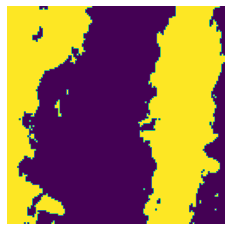

In [7]:
from tensorflow.keras.utils import array_to_img
arr_to_image = train_label[10][:,:,np.newaxis]
plt.axis("off")
plt.imshow(array_to_img(arr_to_image))
print(np.amax(arr_to_image))


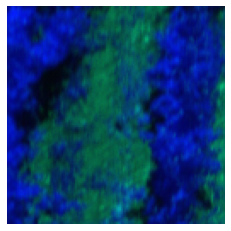

In [8]:
arr_to_image = train_data[10][:,:,(0,128,180)]
plt.axis("off")
plt.imshow(array_to_img(arr_to_image))

In [9]:
data_augmentation = keras.Sequential(
  [
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.2),
  ]
)

In [46]:
#Test of an already use model (Chapter 9 : semantic segmentation)

img_size = (128, 128)

def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (270,))
    x = layers.Conv2D(64, 3, strides=2, activation="relu", padding="same")(inputs)
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(128, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(256, 3, strides=2, padding="same", activation="relu")(x)
    x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(
    256, 3, activation="relu", padding="same", strides=2)(x)
    x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(
    128, 3, activation="relu", padding="same", strides=2)(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(
    64, 3, activation="relu", padding="same", strides=2)(x)
    outputs = layers.Conv2D(num_classes, 3, activation="softmax",
    padding="same")(x)
    model = keras.Model(inputs, outputs)

    return model

model = get_model(img_size=img_size, num_classes=2)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 270)]   0         
                                                                 
 conv2d_28 (Conv2D)          (None, 64, 64, 64)        155584    
                                                                 
 conv2d_29 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 conv2d_30 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 256)       5900

In [47]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

callbacks = [
keras.callbacks.ModelCheckpoint("first_segmentation.keras",
save_best_only=True)
]

history = model.fit(train_data, train_label,
epochs=30,
callbacks=callbacks,
batch_size=5,
validation_data=(validation_dataset, validation_label))

Epoch 1/30
10/10 [==============================] - 3s 135ms/step - loss: 2.2339 - val_loss: 0.6835
Epoch 2/30
10/10 [==============================] - 1s 90ms/step - loss: 0.7571 - val_loss: 0.6772
Epoch 3/30
10/10 [==============================] - 1s 92ms/step - loss: 0.6740 - val_loss: 0.6660
Epoch 4/30
10/10 [==============================] - 1s 78ms/step - loss: 1.2720 - val_loss: 0.6673
Epoch 5/30
10/10 [==============================] - 1s 93ms/step - loss: 0.6655 - val_loss: 0.6578
Epoch 6/30
10/10 [==============================] - 1s 78ms/step - loss: 0.7018 - val_loss: 0.6584
Epoch 7/30
10/10 [==============================] - 1s 90ms/step - loss: 0.6586 - val_loss: 0.6514
Epoch 8/30
10/10 [==============================] - 1s 79ms/step - loss: 0.6481 - val_loss: 0.9313
Epoch 9/30
10/10 [==============================] - 1s 97ms/step - loss: 0.6963 - val_loss: 0.6478
Epoch 10/30
10/10 [==============================] - 1s 89ms/step - loss: 0.6475 - val_loss: 0.6368
Epoch 11

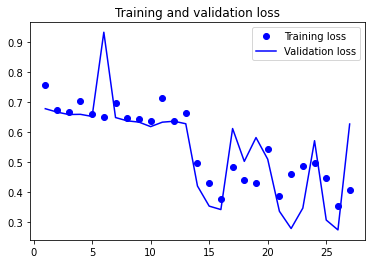

In [49]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
for i in range(len(loss)-1):
  if loss[i] > 1.2 or val_loss[i] > 1.2:
    loss.remove(loss[i])
    val_loss.remove(val_loss[i])
epochs = range(1, len(loss)+1)

plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

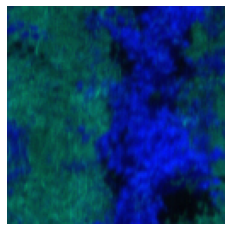

In [52]:
from tensorflow.keras.utils import array_to_img
model = keras.models.load_model("first_segmentation.keras")
test_image = test_data[3]
plt.axis("off")
plt.imshow(array_to_img(test_image[:,:,(0,128,170)]))


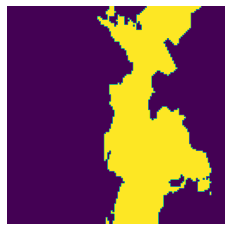

In [53]:
mask_image = test_label[3]
plt.axis("off")
plt.imshow(array_to_img(mask_image[:,:,np.newaxis]))

In [54]:
mask = model.predict(np.expand_dims(test_image, 0))[0]
print(np.argmax(mask, axis=-1))
print(np.max(np.argmax(mask, axis=-1)))
#mask = np.max(mask, axis=-1)
#plt.axis("off")
#plt.imshow(mask)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
1


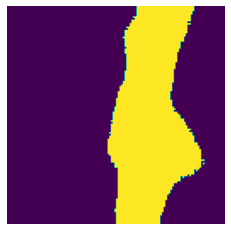

In [55]:
def display_mask(pred):
  mask = np.argmax(pred, axis=-1)
  plt.axis("off")
  plt.imshow(mask)
display_mask(mask)